In [811]:
# Import packages we'll need later on in this tutorial
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math
import plotly.graph_objects as go
from collections import OrderedDict
from matplotlib.lines import Line2D  # Import for creating custom legend markers
import json
import copy
import random
import re
import seaborn as sns
import importlib


# Import BW25 packages
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA

In [ ]:
from standards import *
import Monte_Carlo as MC
import life_cycle_assessment as lc


importlib.reload(MC)
importlib.reload(lc)

In [ ]:
save_dir = results_folder('Results')

In [ ]:
name = "RA - Rune"
db = 'DU consequential final'

flows = ['sc1 - No DU', 'sc2 - CDU', 'sc3 - MDU']
flow_legend = ['No DU', 'CDU', 'MDU']

FU, FU_proc, impact_category, plot_x_axis, sub_product_details = lc.LCA_initialization(name, db, flows)
impat =  impact_category[1]
df = lc.life_cycle_impact_assessment(flows, FU, impat, FU_proc)


In [790]:
file_name = r'Results\Ananas - CONSQ.xlsx'
sheet_name = 'Ananas'

In [815]:
lc.save_LCA_results(df, r'Results\Ananas - test.xlsx', sheet_name,impat)
df_test = lc.import_LCA_results(r'Results\Ananas - test.xlsx', flows, impat)

DataFrame with nested lists written to Excel successfully.


In [802]:
sub_proccess, amount = lc.sub_process(sub_product_details)
FU_sub, FU_sub_proc, idx = lc.sub_process_initilization(sub_proccess, FU, name, 'df_idx_rune')
flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_proc)
functional_unit_sub_new = lc.N2O_use_replace(FU, functional_unit_sub)
df_cont = lc.LCIA_contribution(impat, flow_count, FU_sub_proc, functional_unit_sub_new, amount, idx)

Process: sc1 - No DU
Process: sc2 - CDU
Process: sc3 - MDU
{'nitrous oxide production' (kilogram, RER, None): 0.867460675121784}
{'nitrous oxide production' (kilogram, RER, None): 0.867460675121784}
{'nitrous oxide production' (kilogram, RER, None): 0.867460675121784}
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is needed
Initialization is completed
Biosphere database already present!!! No setup is n

In [816]:
# filtered_dict = {}
# for scenario in FU:
#     for sc_key, sc_item in scenario.items():

#         for sc_proc_key, sc_proc_item in sc_item.items():
#             if 'Consequential' in sc_proc_key[0]:
#                 filtered_dict[sc_proc_key] = sc_proc_item 
#                 print(sc_item)
# filtered_dict

In [817]:
# sub_proccess = {}
# amount = {}
# for key, details in sub_product_details.items():
#     print(f"Process: {key}")

#     sub_proccess[key] = []

#     for detail in details:
        
#         sub_proccess[key].append([detail[0], detail[1], detail[3]])
#         amount[detail[1]] = []
#         amount[detail[1]].append(detail[3])


In [818]:
# # Initializing empty dictionaries to store the results
# FU_sub = {key: [] for key in sub_proccess}
# FU_sub_proc = {key: [] for key in sub_proccess}


# for proc, sub_proc in sub_proccess.items():
#     # print(f'Process: {proc}')
#     temp = {}
#     fu_temp = []
#     for proc_idx in range(len(sub_proc)):
#         #print(sub_proc[proc_idx])
#         flow = [sub_proc[proc_idx][1]]
        
#         db_proc = sub_proc[proc_idx][0][0]
#         #print(f'Flow : {flow}, Database: {db_proc}, Subprocess : {sub_proc}')
#         if db_proc == 'Consequential' and sub_proc[proc_idx][0] in filtered_dict:
#             #print(flow)
#             fu = [{flow[0] : filtered_dict}]
#             p = flow

#         else:
#             fu, p, ic, pxa, kokos = lc.LCA_initialization(name, db_proc,flow)

        
#         temp[flow[0]] = []
#         temp[flow[0]].append(p)
#         for fuck in fu:
#             fu_temp.append(fuck)

#     FU_sub[proc].append(fu_temp)
#     FU_sub_proc[proc].append(temp)
    


In [578]:
# df_sub = {} # life_cycle_impact_assessment(sub_proccess, FU_sub, impact_category, FU_sub_proc)
# proc_counter = 1
# flow_sub = []
# functional_unit_sub = []
# for key, item in FU_sub_proc.items():
#     # print(key)
#     df_temp = {}
#     for pommesfrit in item:
#         for pom_process, pom_subprocess in pommesfrit.items():
#             for pompom in pom_subprocess:

#                 fu_proc_temp = pom_process
#                 fu_sub_proc_temp = pompom
#                 fu_temp = FU_sub[key][0]

#                 proc_counter += 1
#                 flow_sub.append(fu_proc_temp)
#         functional_unit_sub.append(fu_temp)


In [819]:
# idx = []
# sc_counter = 1
# for k, i in FU_sub_proc.items():
#     for kk, ii in i[0].items():
#         idx.append(kk + f' - sc {sc_counter}')
#     sc_counter += 1


In [580]:
# with open("index_rune", "w") as fp:
#     json.dump(idx, fp)

In [581]:
# n = len(idx) #len(proc_counter)  # number of rows (flows)
# m = len(impact_category)  # number of columns (impact categories)



# df_cont = pd.DataFrame(0, index=idx, columns=impact_category, dtype=object)  # dtype=object to handle lists


In [582]:
# def N2O_use_replace(FU, FU_sub):
#     functional_unit_sub_new = copy.deepcopy(FU_sub)

#     for fcu in range(len(FU_sub)):
#         for fu_ind in range(len(FU_sub[fcu])):
#             for fu_ind_key, fu_ind_item in FU_sub[fcu][fu_ind].items():
#                 funky_key = [i for i in fu_ind_item.keys()][0]
#                 for fu_sc in range(len(FU)):
#                     for uuuu, fu_sc_val in FU[fu_sc].items():
#                         funky_key_sc = [i for i in fu_sc_val.keys()][0]
#                         if fu_ind_key in f'{funky_key_sc}' and 'biosphere3' in funky_key[0]:
#                             functional_unit_sub_new[fcu][fu_ind].update({fu_ind_key : fu_sc_val})
#     return functional_unit_sub_new


In [583]:
# functional_unit_sub_new = N2O_use_replace(FU, functional_unit_sub)


In [584]:
# flow_count = 0

# for func_unit in functional_unit_sub:
#     flow_count += len(func_unit) 



In [820]:
# calc = m*flow_count
# dct = {}
# row_counter = 0
# calc_count = 1


# # Iterate over impact categories (columns)
# for column in range(m):
#     # Iterate over processes and their corresponding flows in FU_sub_proc
#     cat = impact_category[column]
#     for k, i in FU_sub_proc.items():
#         # For each flow in the current process
        
#         for f in i[0].keys():
#             accounted_flows = []
            
#             print(f"Processing flow: {f} in impact category: {cat[1]}")

#             # Initialize the result list for the current flow
#             dct[f] = []
#             df_lst = []

#             # Perform LCA for each functional unit
#             for func_unit in range(len(functional_unit_sub_new)):
                
#                 for FU_dict in functional_unit_sub_new[func_unit]:
#                     for  dk, di in FU_dict.items():
#                         # print(dk, di)
#                         div = [proc_val for proc_val in di.values()][0]
#                         if dk in f and di.keys() not in accounted_flows:
                            
#                             accounted_flows.append(di.keys())
#                             FU_dict_copy = copy.deepcopy(FU_dict)

#                             # Update the flow amounts
#                             for key, item in FU_dict.items():
#                                 for FU_key, FU_val in item.items():
#                                     FU_dict_copy[key][FU_key] = FU_dict[key][FU_key] * amount[f][0]
                
#                             # Perform LCA
#                             lca = bw.LCA(FU_dict_copy[key], cat)
#                             lca.lci()
#                             lca.lcia()

#                             # Append the result (using the temp variable for functional unit sub-process)
#                             df_lst.append([f'{FU_key}', lca.score])
#                             print(f"{FU_key} Calculation {calc_count} of {calc}, Score: {lca.score} {cat[1]}")
#                             calc_count += 1

            
            

#             # # Assign the result list to the DataFrame for the current flow and column (impact category)
#             df_cont.iloc[row_counter, column] = df_lst
#             print(f'row : {row_counter}, col : {column} is assigned list : {df_lst}')


#             # Update the row counter after processing all flows in the current impact category
#             row_counter += 1

#             # Reset the row counter if it reaches the number of rows (flows)
#             if row_counter == n:
#                 row_counter = 0


In [585]:
file_name_sub = r'Results\Ananas sub - CONSQ.xlsx'


In [822]:
# # Convert each cell to a JSON string for all columns
# df_sub = df_cont.applymap(lambda x: json.dumps(x) if isinstance(x, list) else x)

# # Save to Excel
# with pd.ExcelWriter(file_name_sub) as writer:
#     df_sub.to_excel(writer, sheet_name=sheet_name, index=False, header=True)

# print('DataFrame with nested lists written to Excel successfully.')

In [587]:
# df1_sub = pd.read_excel(file_name_sub)


In [588]:
# # Reading from Excel
# df1 = pd.read_excel(file_name)
# df1_sub = pd.read_excel(file_name_sub)

# # Convert JSON strings back to lists for all columns
# df1 = df1.applymap(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)

# df1 = df1.set_axis(flows)
# df1.columns = impact_category

# df_updated = df1.copy()
# df_tot = df_updated.copy()


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\3133344276.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)


In [821]:
# df_updated

In [823]:
df_tot = df_test.copy()

for col in range(df_test.shape[1]):  # Iterate over columns
    for row in range(df_test.shape[0]):  # Iterate over rows
        tot = 0
        for i in range(len(df_test.iloc[row,col])):
            #print(df_updated.iloc[row,col][i][1])
            tot += df_test.iloc[row,col][i][1]
        df_tot.iloc[row,col] = tot
        # print('New row')
df_tot

,"(EF v3.1 EN15804, climate change, global warming potential (GWP100))"
sc1 - No DU,231.50288
sc2 - CDU,47.73204
sc3 - MDU,47.915144


In [591]:
df_cols = df_tot.columns
df_cols = df_cols.to_list()

df_norm = pd.DataFrame().reindex_like(df_tot) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols:
    scaling_factor = max(abs(df_tot[i]))
    # print(df_tot[i])
    for j in range(len(df_tot[df_cols[0]])):
        df_norm[i][j] =df_tot[i][j]/scaling_factor

# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\3962810081.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_norm[i][j] =df_tot[i][j]/scaling_factor
C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\3962810081.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assig

In [592]:
index_list = list(df1.index.values)
plot_x_axis = [0] * len(impact_category)
for i in range(len(plot_x_axis)):
    if "photochemical oxidant formation" in impact_category[i][1]:
        plot_x_axis[i] = "photochemical oxidant formation"
    else:
        plot_x_axis[i] = impact_category[i][1].title()

df_GWP = df_updated[df_updated.columns[1]].to_frame()

In [593]:
x_axis = []
GWP_value = []

for df_size in range(len(df_GWP)):
    lst_x = []
    lst_GWP = []
    gwp_tot = 0
    for key in df_GWP.keys():
        for lst_size in range(len(df_GWP[key][df_size])):
            x = df_GWP[key][df_size][lst_size][0]
            gwp = df_GWP[key][df_size][lst_size][1]
            
            if '- FU' in x:
                #print(key)
                x = x.replace(f' - FU', '')
            if 'Use' in x:           
                x = 'Labor'
            if 'nitrous' in x:
                x = 'N2O prod.'
            if 'market for electricity' in x:
                x = 'Avoided electricity'
            if 'Steel' in x:
                x = 'Cylinder prod.'

            if '50L' in x:
                x = x.replace(' 50L', '')
            if 'updated' in x:
                x = x.replace('updated', 'prod.')

            lst_x.append(x)
            lst_GWP.append(gwp)
            gwp_tot += gwp
    
    lst_GWP.append(gwp_tot)
    lst_x.append('Total')
    x_axis.append(lst_x)
    GWP_value.append(lst_GWP)

# x_axis

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\1795852045.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for lst_size in range(len(df_GWP[key][df_size])):
C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\1795852045.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = df_GWP[key][df_size][lst_size][0]
C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\1795852045.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gwp = d

In [594]:
# Categories definitions
categories = ["Raw mat. + prod.", "Use", "EoL", "Total"]
category_mapping = {
    "Raw mat. + prod.": ["Cylinder prod.", "N2O prod.", "CDU prod.", "MDU prod.", "Production"],
    "Use": ["Labor"],
    "EoL": ["EoL cylinder", "EoL CDU", "EoL MDU"],
    "Total": ["Total"]
}

# Ensure the legend displays items in the category order
ordered_legend = {key: [] for key in category_mapping}

for x_lst in range(len(x_axis)):
    for x in range(len(x_axis[x_lst])):
        
        for key, item in category_mapping.items():
                if x_axis[x_lst][x] in item:
                    ordered_legend[key].append(x_axis[x_lst][x])

plot_legend = {key: [] for key in category_mapping}
temp = []

for key,value in ordered_legend.items():
    #print(key, value)
    for val in value:
        if val not in temp:
            temp.append(val)
            #print(val)
            plot_legend[key].append(val)


colors = plot_colors(temp,'turbo')


In [595]:
columns_to_plot = df_norm.columns

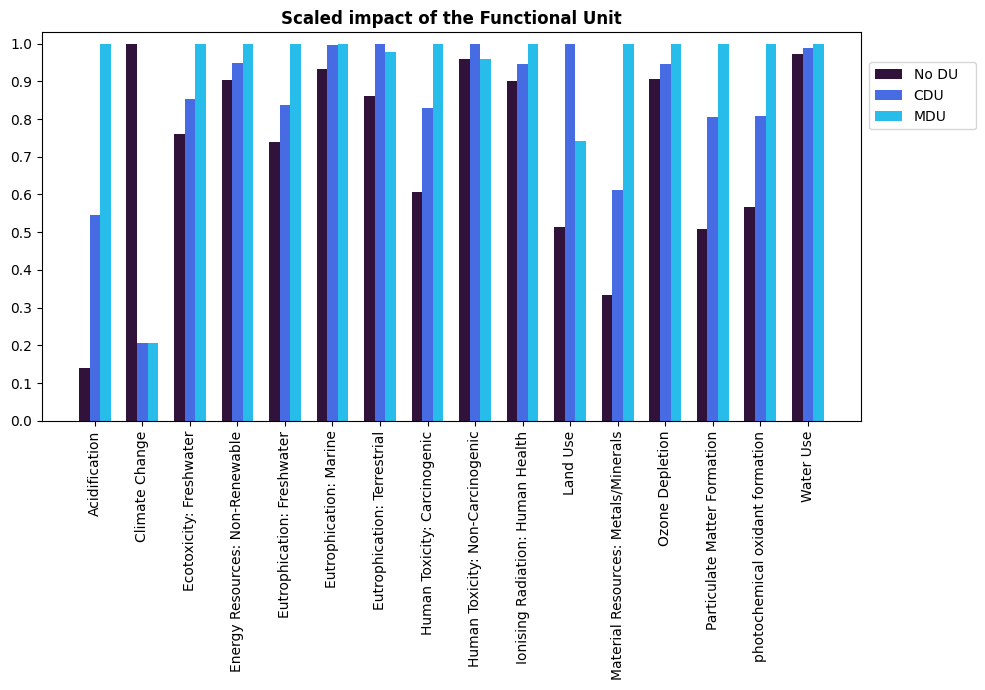

In [596]:

# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width), values, bar_width, label=process, color=colors[i])
    

# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

ax.legend(flow_legend,bbox_to_anchor=(1.01, .75, .13, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [597]:
directory = 'C:\\Users\\ruw\\Desktop\\RA\\'


# data_NW = pd.read_excel(file)


In [598]:
def LCA_normalization(directory, df):
    file = f'{directory}Single-use-vs-multi-use-in-health-care\\Norm + Weigh.xlsx'
    data_NW = pd.read_excel(file)
    columns = df.columns

    norm_lst = data_NW['Normalization']
    weigh_lst = data_NW['Weighting'].to_list

    norm_lst = [0]*(len(data_NW['Normalization']))
    weigh_lst = [0]*(len(data_NW['Weighting']))

    for i in range(len(data_NW['Normalization'])):
        norm_lst[i] = data_NW['Normalization'][i]
        weigh_lst[i] = data_NW['Weighting'][i]

    norm_df = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
    weigh_df = pd.DataFrame().reindex_like(df)

    counter = 0
    for i in columns:
        for j in range(len(df[columns[0]])):
            norm_df[i][j] =df[i][j] * norm_lst[counter]
            weigh_df[i][j] =norm_df[i][j] * weigh_lst[counter]
        counter +=1

    lst = [0] * len(weigh_df[columns[0]])
    for j in range(len(weigh_df[columns[0]])):
        for i in columns:
            lst[j] += weigh_df[i][j]

    lst_norm_weighted = [0] * len(lst)
    lst_max = max(lst)


    for n in range(len(lst)):
        lst_norm_weighted[n] = lst[n]/lst_max

    return lst_norm_weighted

In [599]:
lst_scaled = LCA_normalization(directory, df_tot)

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\2809958199.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm_df[i][j] =df[i][j] * norm_lst[counter]
C:\Users\ruw\AppData\Local\Temp\5\ipykernel_11316\2809958199.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the as

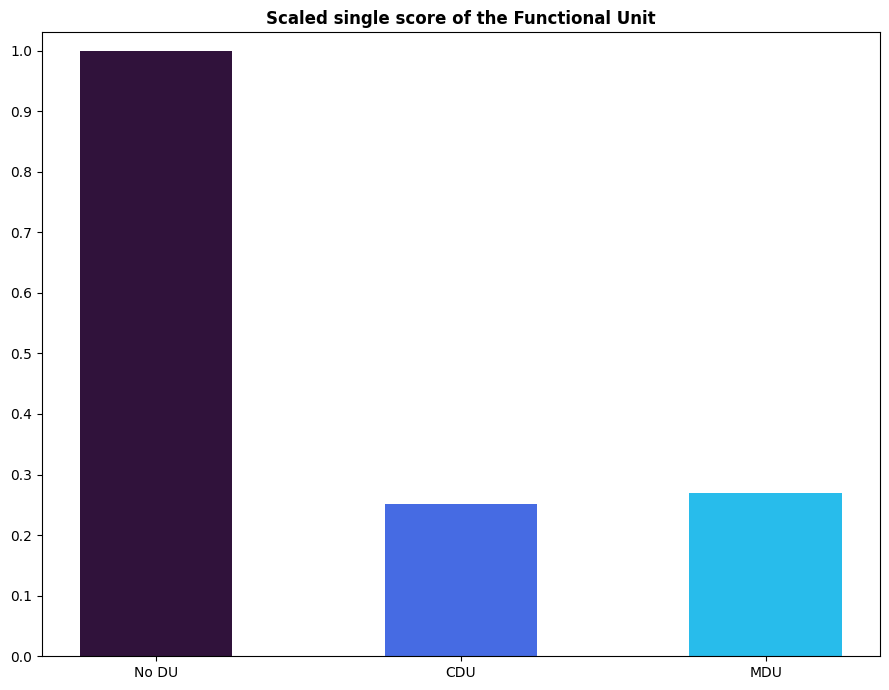

In [600]:
# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list)-1) 
index = np.arange(len(index_list))   

ax.bar(index + bar_width, lst_scaled, bar_width, label=index_list, color=colors)

# Setting labels and title
ax.set_title('Scaled single score of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(flow_legend)
#plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

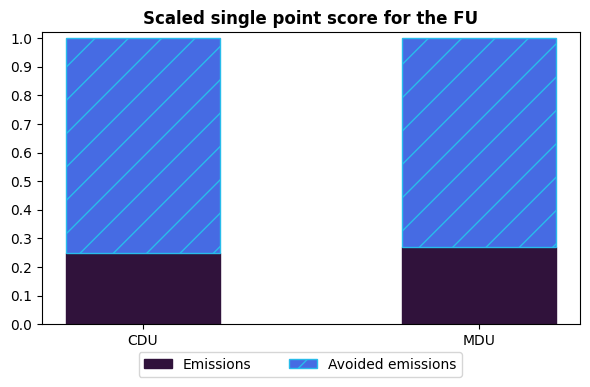

In [601]:
# Calculate bottom and top parts
bottoms = lst_scaled[1:]
last_value = lst_scaled[0]
tops = [last_value - bottom for bottom in bottoms]

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

# Bar positions
bar_positions = [0, 1.75]

# Bottom parts (first two values)
ax.bar(bar_positions, bottoms, label='Emissions',color=colors[0], edgecolor=colors[0])

# Top parts (values after subtraction) with hatching
ax.bar(bar_positions, tops, bottom=bottoms, label='Avoided emissions', color=colors[1], edgecolor=colors[2], hatch='/')


# Adding labels and titlecolors[1]
ax.set_xticks(bar_positions)
ax.set_xticklabels(['CDU', 'MDU'])

# Setting labels and title
ax.set_title('Scaled single point score for the FU',weight='bold')
plt.yticks(np.arange(0, 1.02, step=0.1))
plt.ylim(0, 1.02)

ax.legend(['Emissions', 'Avoided emissions'], bbox_to_anchor=(0.18, -0.18, 0.6, 0.2), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=2)

# ax.plot(bottoms,'o',color=colors[1])
# Show the plot
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, 'GWP_res.jpg'), bbox_inches='tight')
plt.show()

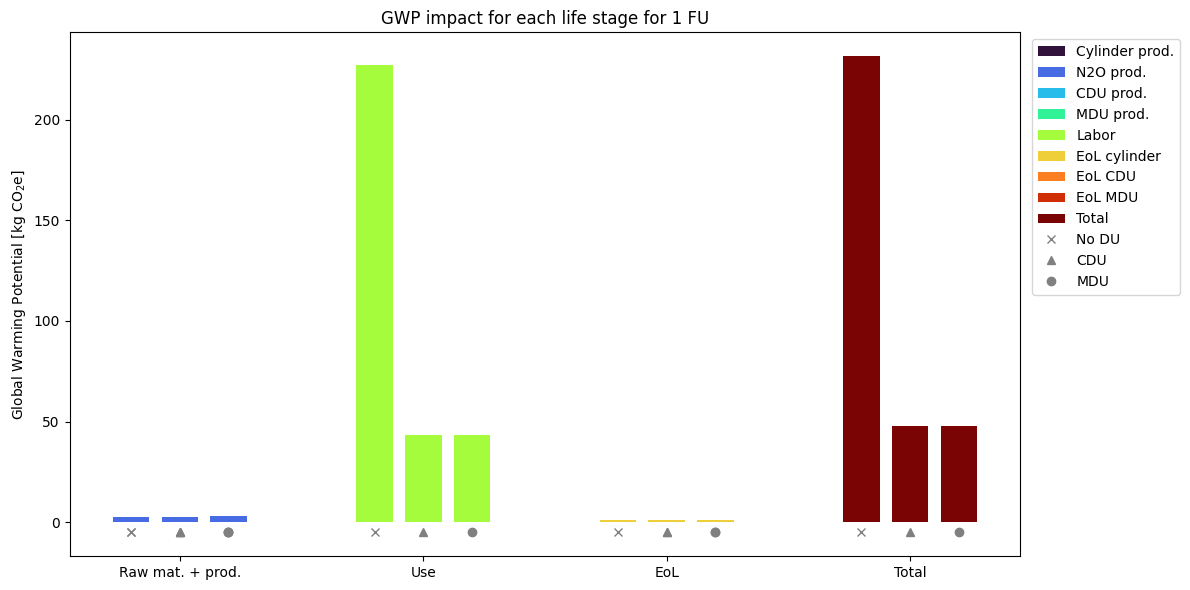

In [602]:

color_map = {}
#unique_processes = {process for sublist in x_axis for process in sublist}
for i, process in enumerate(temp):
    color_map[process] = colors[i]
    #print(process, i)



# Initialize an ordered dictionary for legend_handles to maintain the order
legend_handles = OrderedDict()

# Initialize legend_handles with keys from plot_legend and empty lists
for process in temp:
    legend_handles[process] = None

# Plotting logic
if len(x_axis) == len(GWP_value):
    num_scenarios = len(GWP_value)  # Number of scenarios
    bar_width = 0.15  # Width of the bars for each scenario
    space_between_scenarios = 0.05  # Space between each scenario set
    index = np.arange(len(categories))  # X-axis index positions for the categories

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    scenario_marker = ['x', '^', 'o']  # List of markers for scenarios
    all_markers = []  # List to store Line2D objects for markers

    # Main plotting logic
    for scenario in range(num_scenarios):
        bottom_positive = np.zeros(len(categories))  # Initialize the bottom array for positive values
        bottom_negative = np.zeros(len(categories))  # Initialize the bottom array for negative values
        scenario_index = index + scenario * (bar_width + space_between_scenarios)

        for length in range(len(x_axis[scenario])):
            process_name = x_axis[scenario][length]
            value = GWP_value[scenario][length]

            # Determine which category this process falls into
            for i, category in enumerate(categories):
                if any(keyword in process_name for keyword in category_mapping[category]):
                    # Assign color based on the process name
                    color = color_map[process_name]

                    # Create a bar with the specific color
                    if value >= 0:
                        bar = ax.bar(scenario_index[i], value, bar_width,
                                    label=f"{process_name}" if legend_handles[process_name] is None else "",
                                    bottom=bottom_positive[i],
                                    color=color)
                        bottom_positive[i] += value
                    else:
                        bar = ax.bar(scenario_index[i], value, bar_width,
                                    label=f"{process_name}" if legend_handles[process_name] is None else "",
                                    bottom=bottom_negative[i],
                                    color=color)
                        bottom_negative[i] += value

                    # Add the bar to the corresponding process in legend_handles
                    if legend_handles[process_name] is None:
                        legend_handles[process_name] = bar

                    # Add plot markers (symbols) at the bottom
                    ax.plot(scenario_index[i], -5, marker=scenario_marker[scenario], color='gray')

                    break

    # Add custom markers to the legend
    for i, marker in enumerate(scenario_marker):
        all_markers.append(Line2D([0], [0], marker=marker, color='gray', linestyle='None'))

    # Set x-axis labels and ticks, adjusting to account for spacing
    tick_positions = index + (num_scenarios - 1) * (bar_width + space_between_scenarios) / 2
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(categories)

    # Axis limits
    # ax.set_ylim(-.45, 3.55)
    # ax.set_yticks(np.arange(-0.5, 3.6, step=0.25))
    ax.set_ylabel("Global Warming Potential [kg CO$_2$e]")
    ax.set_title('GWP impact for each life stage for 1 FU')

    # Add markers to legend_handles for display at the bottom of the legend
    valid_legend_handles = [(k, v) for k, v in legend_handles.items() if v is not None]
    legend_handles_for_display = valid_legend_handles + [(flow_legend[i], marker) for i, marker in enumerate(all_markers)]

    if legend_handles_for_display:
        ax.legend(handles=[v for k, v in legend_handles_for_display], labels=[k for k, v in legend_handles_for_display], bbox_to_anchor=(1.005, 1), loc='upper left')

    plt.tight_layout()
    #plt.savefig(os.path.join(save_dir, f'LC_impact_ofir_APOS.jpg'), bbox_inches='tight')
    plt.show()

else:
    print('The x-axis and GWP values have different sizes')


Folder name Results created
Doing Monte Carlo simulations for ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)')
Processing sc1 - No DU
Iteration 1 of 2
Iteration 2 of 2
Processing sc2 - CDU
Iteration 1 of 2
Iteration 2 of 2
Processing sc3 - MDU
Iteration 1 of 2
Iteration 2 of 2


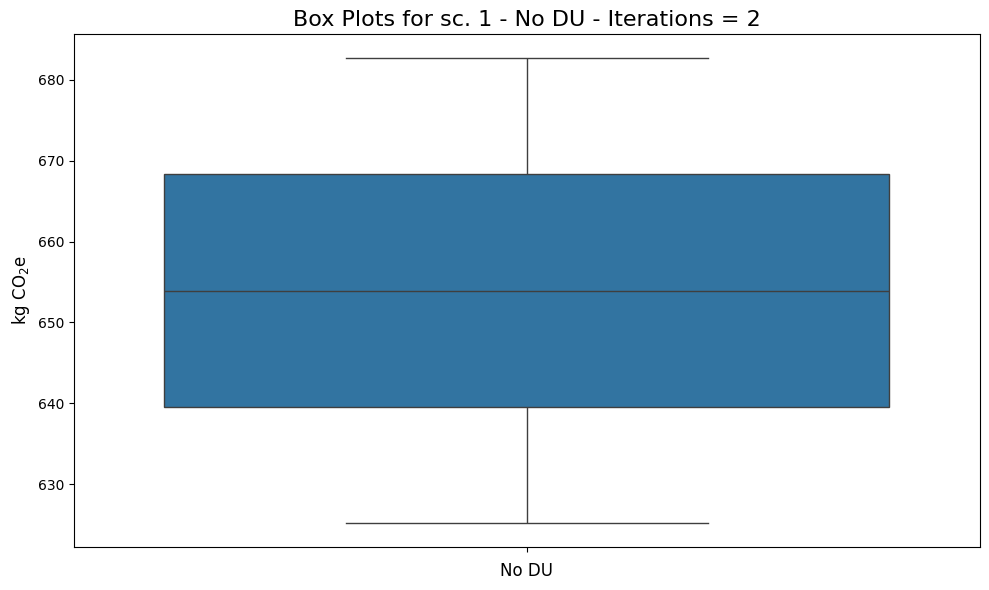

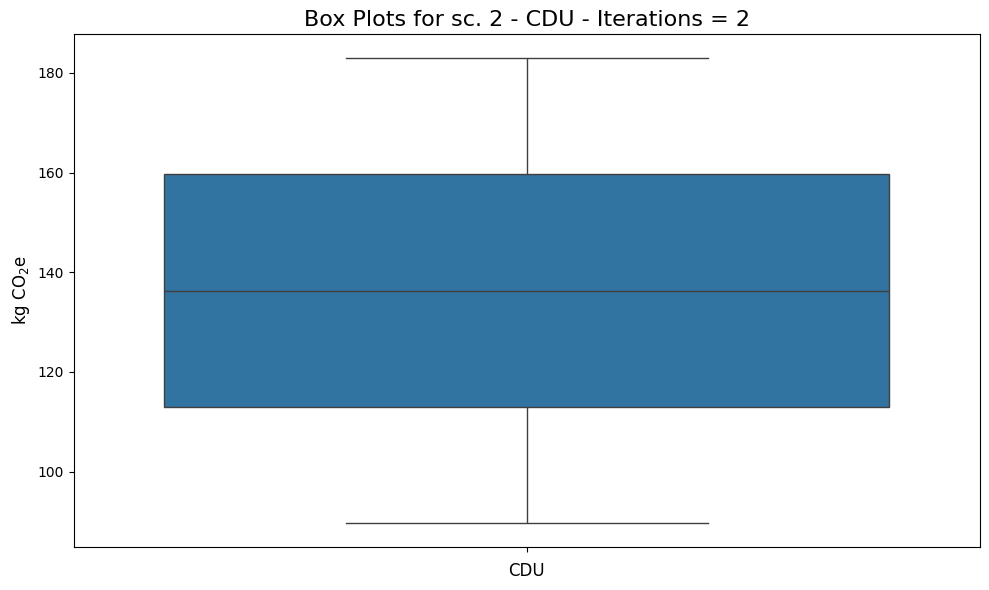

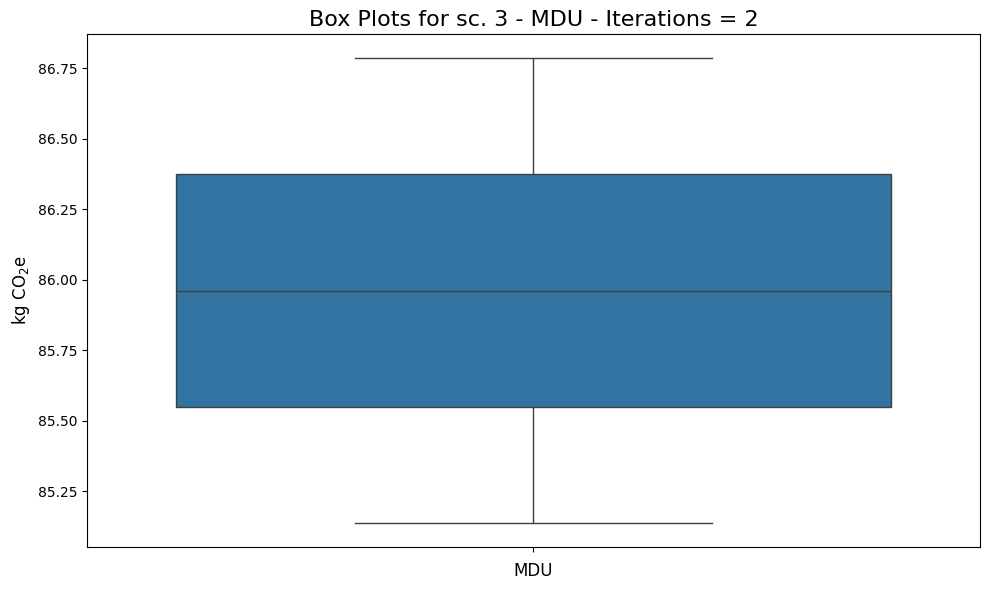

In [718]:
importlib.reload(MC)  # Reloads the module after modification

iterations = 2
impact_method = impact_category[1]
file_MC = 'monte_carlo_simulations_Rune.xlsx'

MC_res, data = MC.MC_simulation(iterations, flows, db, impact_method, file_MC)
MC.MC_graphs(flow_legend, data, iterations)


In [ ]:
file_MC = 'monte_carlo_simulations_Rune.xlsx'
# Create an Excel writer object
with pd.ExcelWriter(file_MC, engine='xlsxwriter') as writer:
    for i, dataframe in enumerate(Monte_Carlo_dct.values()):
        # Get the sheet name and clean it
        sheet_name = clean_sheet_name(impact_category[i][1])
        # Save the dataframe to the corresponding sheet
        dataframe.to_excel(writer, sheet_name=sheet_name)